In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [2]:
# 2. Đọc file dữ liệu chứng khoán và chia train test theo tỉ lệ 8:2
df = pd.read_csv('SCB.csv')
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(df))
test_size = int(0.2 * len(df))
# val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
# val_data = df[train_size+test_size:]

In [3]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.9 MB/s eta 0:00:00


In [4]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=5.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=20422.472, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=20424.472, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=20424.478, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=20421.941, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=20422.294, Time=0.92 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 6.668 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [5]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test)+30)

# 5. Quá trình Validate
# x_val= np.array(val_data.index).reshape(-1, 1)
# y_val = np.array(val_data['Price'])
# y_pred_val =  model.predict(n_periods=len(y_val))

In [6]:
# 5. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
# x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
# y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Predict the closing prices for the next 30 days
y_next_30_days = y_pred[-30:]
y_pred = y_pred[:-30]

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[27100. 27100. 27100. 27100. 27100. 27100. 27100. 27100. 27100. 27100.
 27100. 27100. 27100. 27100. 27100. 27100. 27100. 27100. 27100. 27100.
 27100. 27100. 27100. 27100. 27100. 27100. 27100. 27100. 27100. 27100.]


In [7]:
# 6. Đánh giá độ chính xác test
# valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('RMSE:', test_rmse)


RMSE: 5343.178561760513


Testing RMSE: 5343.178561760513
Mean Absolute Error (MAE): 4352.857142857143
Mean Absolute Percentage Error (MAPE): 19.47792493303638


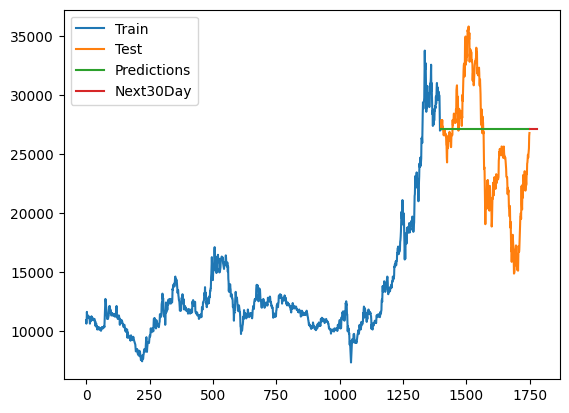

In [8]:
# 7. Tính RMSE, MAE, MSE
# valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
# print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# Calculate MAE
mae = np.mean(np.abs(y_pred - y_test))
print('Mean Absolute Error (MAE):', mae)

# Calculate MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Mean Absolute Percentage Error (MAPE):', mape)


# 8.Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
# plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [ ]:
test_data.index

RangeIndex(start=1225, stop=1575, step=1)

In [10]:
# 2. Đọc file dữ liệu chứng khoán và chia train test theo tỉ lệ 7:3
df1 = pd.read_csv('SCB.csv')
df1 = df1[['Price']]
df1 = df1.dropna() # Drop missing values
df1 = df1.reset_index(drop=True) # Reset the index

# Split the data into training, testing sets
train_size1 = int(0.7 * len(df))
test_size1 = int(0.3 * len(df))

train_data1 = df[:train_size1]
test_data1 = df[train_size1:train_size1+test_size1]


In [11]:
# 3. Quá trình Training
x_train1 = np.array(train_data1.index).reshape(-1, 1)
y_train1 = np.array(train_data1['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model1 = auto_arima(y_train1, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model1.fit(y_train1)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=17158.754, Time=4.97 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=17155.772, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=17156.605, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=17156.653, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=17154.048, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=17158.642, Time=0.18 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 5.813 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [12]:
# 4. Quá trình testing
x_test1 = np.array(test_data1.index).reshape(-1, 1)
y_test1 = np.array(test_data1['Price'])
y_pred1 = model.predict(n_periods=len(y_test1)+30)

In [13]:
# 5. Quá trình tạo index predict 30 ngày tiếp theo
last_index1 =  df1.index[-1]
last_data1 = pd.RangeIndex(start=last_index1, stop=last_index1+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
# x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
# y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Predict the closing prices for the next 30 days
y_next_30_days1 = y_pred1[-30:]
y_pred1 = y_pred1[:-30]

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days1)

Predicted closing prices for the next 30 days:
[27100. 27100. 27100. 27100. 27100. 27100. 27100. 27100. 27100. 27100.
 27100. 27100. 27100. 27100. 27100. 27100. 27100. 27100. 27100. 27100.
 27100. 27100. 27100. 27100. 27100. 27100. 27100. 27100. 27100. 27100.]


In [14]:
# 6. Đánh giá độ chính xác test
# valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse1 = np.sqrt(np.mean((y_pred1 - y_test1)**2))
# print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse1)

Testing RMSE: 5633.888955411241


Testing RMSE: 5633.888955411241
Mean Absolute Error (MAE): 4664.380952380952
Mean Absolute Percentage Error (MAPE): 21.67364423838202


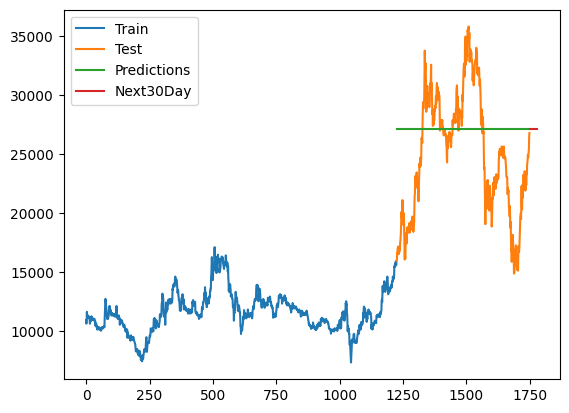

In [15]:
# 7. Tính RMSE
# valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse1 = np.sqrt(np.mean((y_pred1 - y_test1)**2))
# print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse1)

# Calculate MAE
mae1 = np.mean(np.abs(y_pred1 - y_test1))
print('Mean Absolute Error (MAE):', mae1)

# Calculate MAPE
mape1 = np.mean(np.abs((y_test1 - y_pred1) / y_test1)) * 100
print('Mean Absolute Percentage Error (MAPE):', mape1)

# 8.Vẽ hình
plt.plot(train_data1.index, train_data1['Price'])
plt.plot(test_data1.index, test_data1['Price'])
plt.plot(test_data1.index, y_pred1)
plt.plot(last_data1,y_next_30_days1)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [17]:
# 2. Đọc file dữ liệu chứng khoán và chia train test theo tỉ lệ 9:1
df2 = pd.read_csv('SCB.csv')
df2 = df2[['Price']]
df2 = df2.dropna() # Drop missing values
df2 = df2.reset_index(drop=True) # Reset the index

# Split the data into training, testing sets
train_size2 = int(0.9 * len(df2))
test_size2 = int(0.1 * len(df2))

train_data2 = df2[:train_size2]
test_data2 = df2[train_size2:train_size2+test_size2]


In [18]:
# 3. Quá trình Training
x_train2 = np.array(train_data2.index).reshape(-1, 1)
y_train2 = np.array(train_data2['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model2 = auto_arima(y_train2, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model2.fit(y_train2)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=23461.215, Time=2.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=23463.292, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=23463.616, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=23463.628, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=23461.625, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=23464.475, Time=2.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=23467.611, Time=0.32 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=23463.205, Time=4.91 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=23463.227, Time=2.51 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=23465.617, Time=0.22 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=23467.559, Time=0.89 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=23467.870, Time=1.06 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=23465.134, Time=3.52 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=23457.813, Time=1.63 sec
 ARIMA(1,1,2)(0,0,0

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [19]:
# 4. Quá trình testing
x_test2 = np.array(test_data2.index).reshape(-1, 1)
y_test2 = np.array(test_data2['Price'])
y_pred2 = model.predict(n_periods=len(y_test2)+30)


In [20]:
# 5. Quá trình tạo index predict 30 ngày tiếp theo
last_index2 =  df2.index[-1]
last_data2 = pd.RangeIndex(start=last_index2, stop=last_index2+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
# x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
# y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Predict the closing prices for the next 30 days
y_next_30_days2 = y_pred2[-30:]
y_pred2 = y_pred2[:-30]

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days2)

Predicted closing prices for the next 30 days:
[27100. 27100. 27100. 27100. 27100. 27100. 27100. 27100. 27100. 27100.
 27100. 27100. 27100. 27100. 27100. 27100. 27100. 27100. 27100. 27100.
 27100. 27100. 27100. 27100. 27100. 27100. 27100. 27100. 27100. 27100.]


In [21]:
# 6. Đánh giá độ chính xác test
# valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse2 = np.sqrt(np.mean((y_pred2 - y_test2)**2))
# print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse2)

Testing RMSE: 6421.25822116329


Testing RMSE: 6421.25822116329
Mean Absolute Error (MAE): 5671.142857142857
Mean Absolute Percentage Error (MAPE): 29.288115885697717


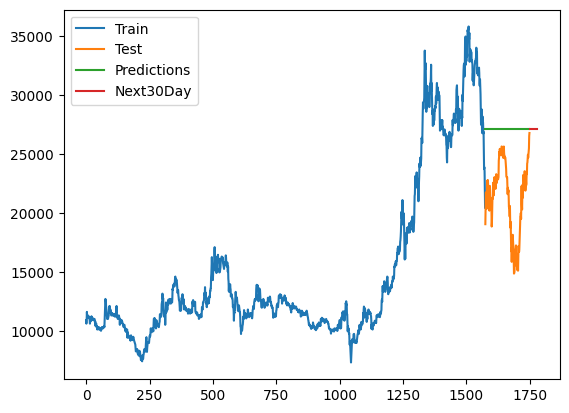

In [22]:
# 7. Tính RMSE
# valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse2 = np.sqrt(np.mean((y_pred2 - y_test2)**2))
# print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse2)

# Calculate MAE
mae2 = np.mean(np.abs(y_pred2 - y_test2))
print('Mean Absolute Error (MAE):', mae2)

# Calculate MAPE
mape2 = np.mean(np.abs((y_test2 - y_pred2) / y_test2)) * 100
print('Mean Absolute Percentage Error (MAPE):', mape2)

# 8.Vẽ hình
plt.plot(train_data2.index, train_data2['Price'])
plt.plot(test_data2.index, test_data2['Price'])
plt.plot(test_data2.index, y_pred2)
plt.plot(last_data2,y_next_30_days2)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()